In [36]:
import librosa
from librosa import display as rosadisp
import numpy as np
import matplotlib.pyplot as plt

In [14]:
y, sr = librosa.load('creep.moshejun_umxhq/other.wav')
tempo1, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
print(tempo1)

/usr/local/lib/python3.6/dist-packages/librosa/beat.py:309: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  hop_length=hop_length))


78.30255681818181


In [15]:
y, sr = librosa.load('creep.radiohead_umxhq/drums.wav')
tempo2, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
print(tempo2)

/usr/local/lib/python3.6/dist-packages/librosa/beat.py:309: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  hop_length=hop_length))


92.28515625


In [21]:
rate = tempo1/tempo2
print(rate)

0.8484848484848484


In [17]:
y_stretch = librosa.effects.time_stretch(y, rate)

In [19]:
librosa.output.write_wav('creep.radiohead_umxhq/drums_slow.wav', y_stretch, sr)

In [57]:
y, sr = librosa.load('creep.radiohead_umxhq/vocals.wav')

In [38]:
plt.rcParams['figure.figsize'] = (15, 10)

/usr/local/lib/python3.6/dist-packages/scipy/sparse/lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
/usr/local/lib/python3.6/dist-packages/scipy/sparse/lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):


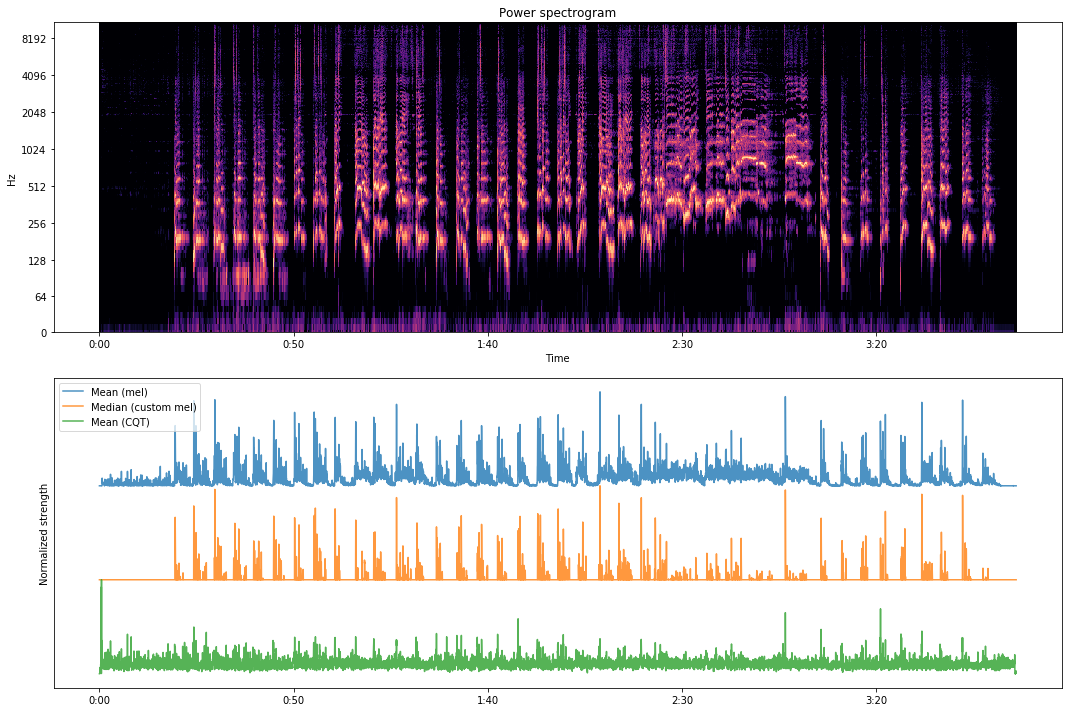

In [59]:
D = np.abs(librosa.stft(y))
times = librosa.frames_to_time(np.arange(D.shape[1]))
plt.figure()
ax1 = plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time')
plt.title('Power spectrogram')

onset_env = librosa.onset.onset_strength(y=y, sr=sr)
plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(times, 2 + onset_env / onset_env.max(), alpha=0.8, label='Mean (mel)')

onset_env = librosa.onset.onset_strength(y=y, sr=sr, aggregate=np.median, fmax=8000, n_mels=256)
plt.plot(times, 1 + onset_env / onset_env.max(), alpha=0.8, label='Median (custom mel)')

onset_env = librosa.onset.onset_strength(y=y, sr=sr,
    feature=librosa.cqt)
plt.plot(times, onset_env / onset_env.max(), alpha=0.8,
    label='Mean (CQT)')
plt.legend(frameon=True, framealpha=0.75)
plt.ylabel('Normalized strength')
plt.yticks([])
plt.axis('tight')
plt.tight_layout()
plt.show()

In [137]:
y, sr = librosa.load('creep.radiohead_umxhq/vocals_stretched.wav')

/usr/local/lib/python3.6/dist-packages/librosa/filters.py:221: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


54
[ 23.4521542   29.14104308  29.81442177  35.64263039  36.85006803
  41.84235828  43.02657596  47.69378685  49.2030839   53.84707483
  60.65052154  61.62575964  66.36263039  67.73260771  72.84099773
  73.95555556  79.22648526  85.10113379  91.76526077  93.73895692
  98.08108844  98.49904762 104.69877551 105.25605442 110.99138322
 116.91247166 117.28399093 123.20507937 123.43727891 124.3660771
 129.52090703 129.91564626 135.39555556 136.20825397 137.02095238
 141.71138322 142.15256236 142.31510204 143.29034014 149.30430839
 150.30276644 154.64489796 157.36163265 160.47310658 167.36943311
 171.71156463 174.79981859 198.25197279 248.80181406 254.07274376
 260.08671202 260.34213152 266.65795918 267.79573696]


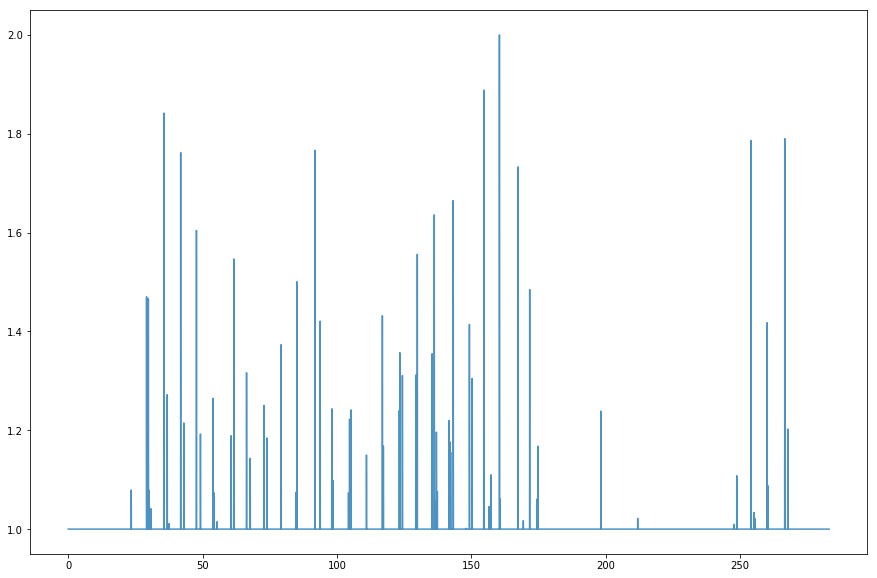

In [154]:
D = np.abs(librosa.stft(y))
times = librosa.frames_to_time(np.arange(D.shape[1]))
onset_env = librosa.onset.onset_strength(y=y, sr=sr, aggregate=np.median, fmax=25000, n_mels=870)
plt.plot(times, 1 + onset_env / onset_env.max(), alpha=0.8, label='Median (custom mel)')
onsets = librosa.onset.onset_detect(y, sr, onset_env, units='time')
print(len(onsets))
print(onsets)

In [64]:
y, sr = librosa.load('creep.moshejun_umxhq/vocals.wav')

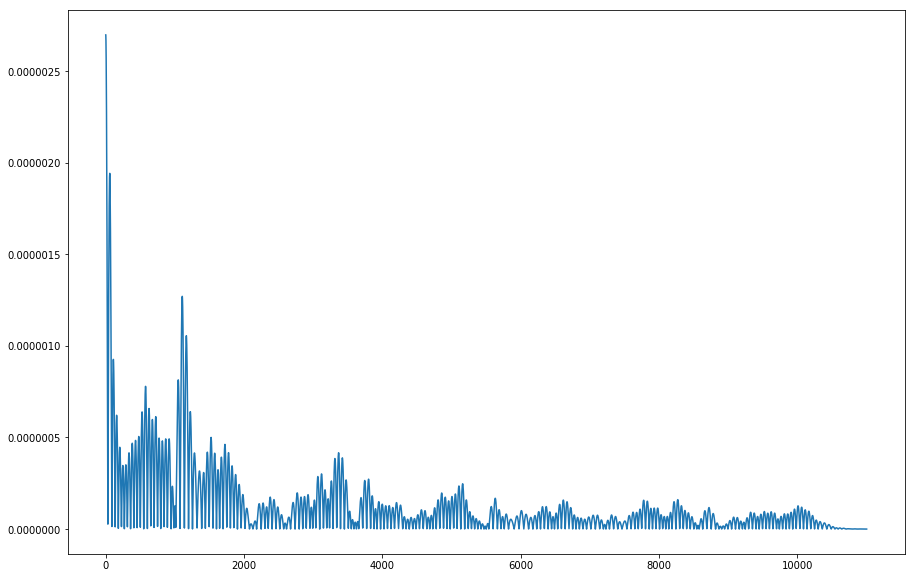

In [77]:
n_fft = 22000
D = np.abs(librosa.stft(y[:n_fft], n_fft=n_fft, hop_length=n_fft+1))
plt.plot(D);

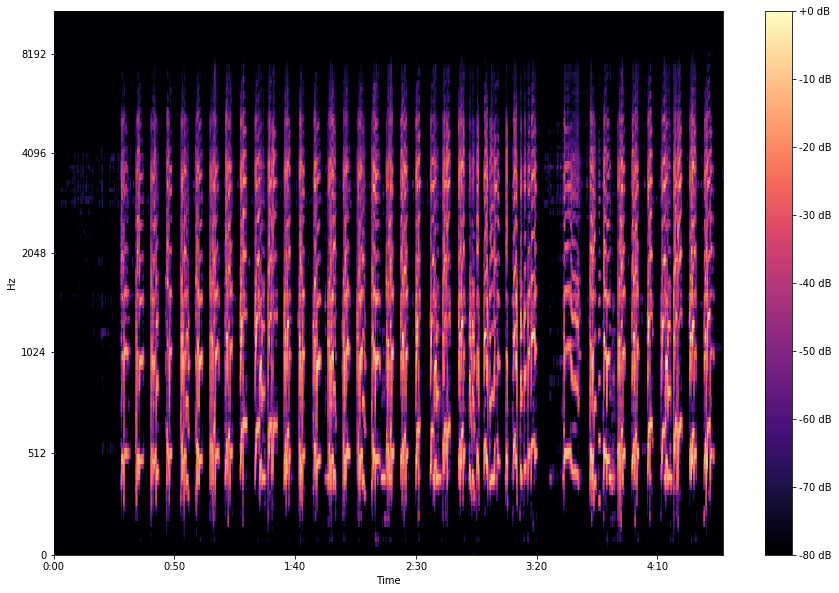

In [81]:
S = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, 
                         x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');